In [1]:
import numpy as np
import torch
from scipy.special import psi
import math
from scipy.stats import beta
import matplotlib.pyplot as plt

In [2]:
def el(x):
    return torch.nn.functional.elu(x) + 1

In [3]:
def criterion(z, alpha, beta):
    return  (1 - alpha) * torch.log(z) + \
            (1 - beta) * torch.log(1 - z) - \
            torch.lgamma(alpha + beta) + \
            torch.lgamma(alpha) + \
            torch.lgamma(beta)

In [4]:
theta = torch.zeros(1, 2, requires_grad = True)

In [50]:
num_epochs = 1000
for i in range(1, num_epochs + 1):
    output = el(theta)
    loss = criterion(torch.tensor(0.1), output[0][0], output[0][1])
    if i % 100 == 0:
        print("loss:", loss.item())
    loss.backward()
    with torch.no_grad():
        theta -= 1 * theta.grad
        theta.grad = None

loss: -1.4970722198486328
loss: -1.6652889251708984
loss: -1.7647838592529297
loss: -1.835723876953125
loss: -1.890899658203125
loss: -1.9360694885253906
loss: -1.9743118286132812
loss: -2.007465362548828
loss: -2.0367279052734375
loss: -2.0629196166992188


In [51]:
theta

tensor([[ 2.9267, 30.0195]], requires_grad=True)

In [58]:
theta = torch.zeros(1, 2)

In [59]:
num_epochs = 10
for i in range(1, num_epochs + 1):
    output = el(theta)
    loss = criterion(torch.tensor(0.1), output[0][0], output[0][1])
    if i % 100 == 0:
        print("loss:", loss.item())
    with torch.no_grad():
        grad_alpha = -1 * (math.log(0.1) + output[0][1] * psi(output[0][0]*output[0][1]) - psi(output[0][0]))
        grad_beta = -1 * (math.log(1 - 0.1) + output[0][0] * psi(output[0][0]*output[0][1]) - psi(output[0][1]))
        print(grad_alpha)
        print(grad_beta)
        theta[0][0] -= 1 * grad_alpha
        theta[0][1] -= 1 * grad_beta

tensor(2.3026)
tensor(0.1054)
tensor(2.2732)
tensor(0.5054)
tensor(2.0506)
tensor(0.1871)
tensor(1.9871)
tensor(0.0951)
tensor(1.9619)
tensor(0.0537)
tensor(1.9492)
tensor(0.0316)
tensor(1.9375)
tensor(0.0190)
tensor(1.7500)
tensor(0.0116)
tensor(2.)
tensor(0.0071)
tensor(nan)
tensor(nan)


In [56]:
a = el(theta[0][0]).detach().numpy()
b = el(theta[0][1]).detach().numpy()

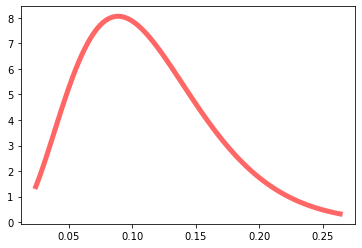

In [57]:
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)

plt.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')